In [122]:
import pandas as pd
import json

# Load the JSON file
with open('/Users/cicisofia/Downloads/logins.json') as f:
    data = json.load(f)

# Create a DataFrame directly from the dictionary
logins_df = pd.DataFrame(data)

# Check structure – should see 'login_time' as a column
print("Columns:", logins_df.columns)
print("First few rows:\n", logins_df.head())

# Convert login_time to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'], errors='coerce')

# Optional: check if any datetimes failed to parse
print("Null datetime entries (if any):", logins_df['login_time'].isnull().sum())

# Confirm full dataset is intact
print("Total login records:", len(logins_df))


Columns: Index(['login_time'], dtype='object')
First few rows:
             login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21
Null datetime entries (if any): 0
Total login records: 93142


In [123]:
# Set datetime as index
logins_df.set_index('login_time', inplace=True)

# Resample to 15-minute bins, counting logins in each
login_counts = logins_df.resample('15T').size()

# Peek at the data
print(login_counts.head())


login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64


In [124]:
print("Data type:", type(data))
# Peek at the top-level keys
print("Top-level keys:", list(data.keys()))

key = list(data.keys())[0]
print(f"First few entries under '{key}':", data[key][:5])


Data type: <class 'dict'>
Top-level keys: ['login_time']
First few entries under 'login_time': ['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21']


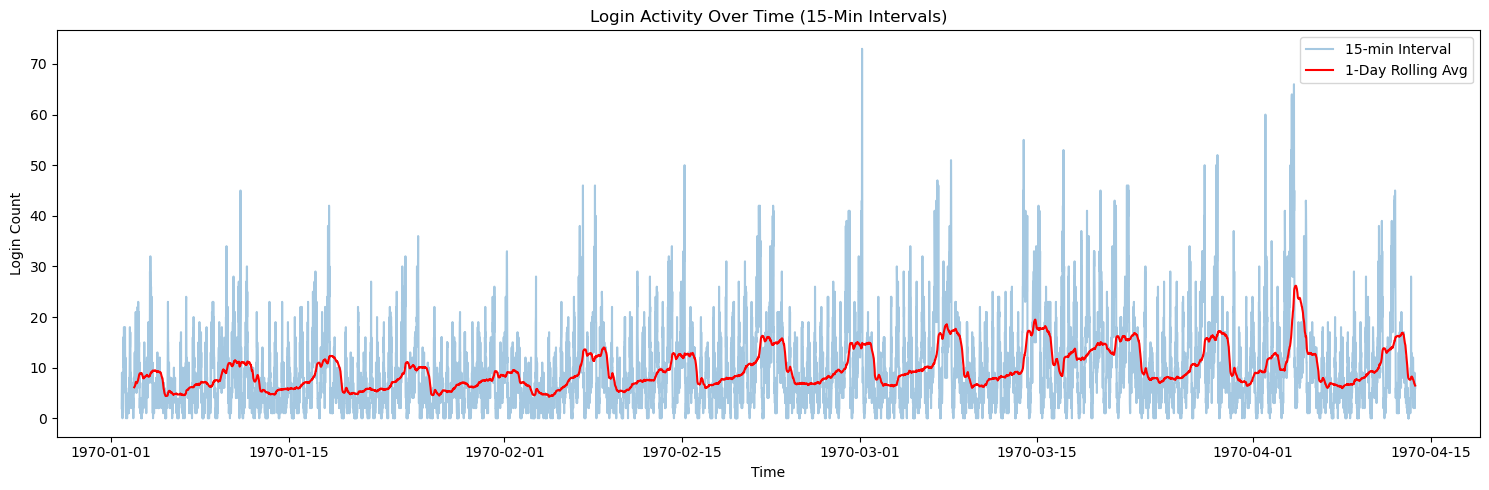

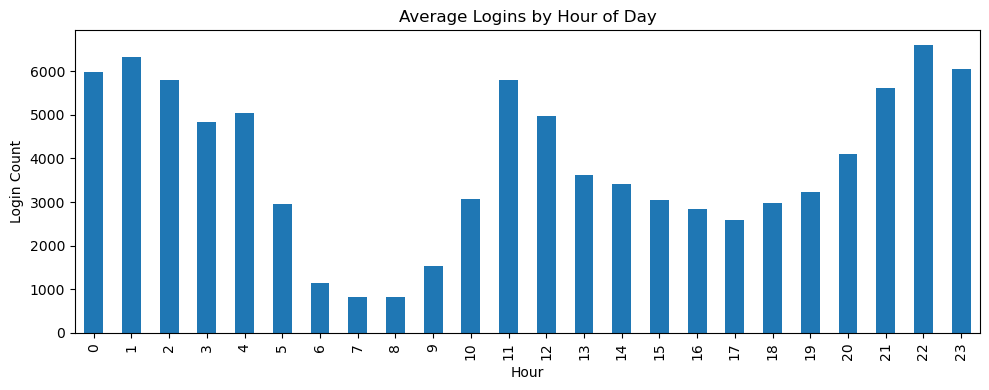

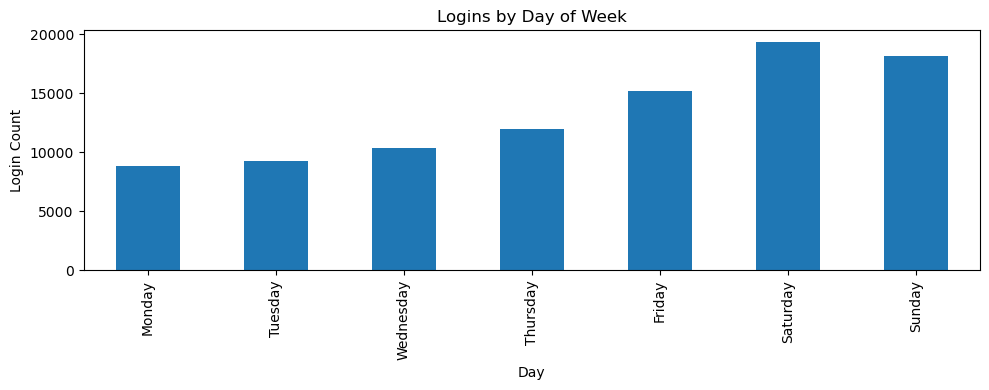

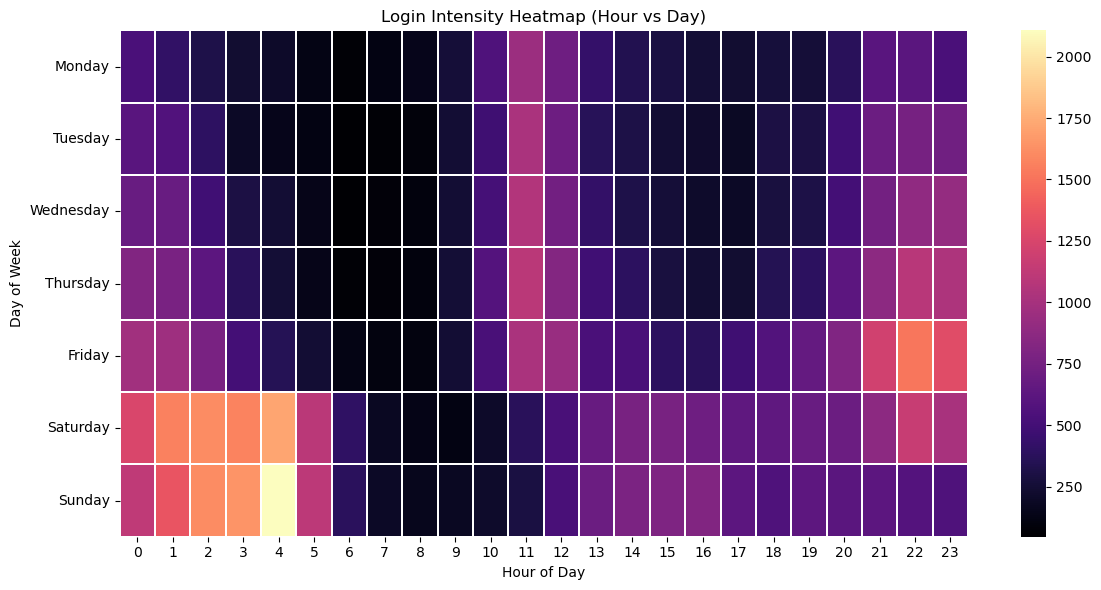

In [125]:

import matplotlib.pyplot as plt
import seaborn as sns

# Load and prep data
with open('/Users/cicisofia/Downloads/logins.json') as f:
    data = json.load(f)

# Create DataFrame
logins_df = pd.DataFrame(data['login_time'], columns=['login_time'])

# Convert to datetime
logins_df['login_time'] = pd.to_datetime(logins_df['login_time'])

# Set index for resampling
logins_df.set_index('login_time', inplace=True)

# Resample into 15-minute intervals
login_counts = logins_df.resample('15T').size()

# Rolling average for smoothness (1 day = 96 intervals)
rolling_avg = login_counts.rolling(window=96).mean()

# Plot 15-min login counts with trend
plt.figure(figsize=(15, 5))
plt.plot(login_counts, alpha=0.4, label='15-min Interval')
plt.plot(rolling_avg, color='red', label='1-Day Rolling Avg')
plt.title('Login Activity Over Time (15-Min Intervals)')
plt.xlabel('Time')
plt.ylabel('Login Count')
plt.legend()
plt.tight_layout()
plt.show()

# Add hour and day of week for pattern analysis
logins_df_reset = logins_df.reset_index()
logins_df_reset['hour'] = logins_df_reset['login_time'].dt.hour
logins_df_reset['day_of_week'] = logins_df_reset['login_time'].dt.day_name()

# Plot: Average login volume by hour
plt.figure(figsize=(10, 4))
logins_df_reset.groupby('hour').size().plot(kind='bar')
plt.title('Average Logins by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Login Count')
plt.tight_layout()
plt.show()

# Plot: Average login volume by day of week
plt.figure(figsize=(10, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
logins_df_reset['day_of_week'] = pd.Categorical(logins_df_reset['day_of_week'], categories=order, ordered=True)
logins_df_reset.groupby('day_of_week', observed=True).size().plot(kind='bar')
plt.title('Logins by Day of Week')
plt.xlabel('Day')
plt.ylabel('Login Count')
plt.tight_layout()
plt.show()

# Heatmap: Hour vs Day pattern
heatmap_data = logins_df_reset.groupby(['day_of_week', 'hour'], observed=True).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="magma", linewidths=0.2)
plt.title('Login Intensity Heatmap (Hour vs Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


In [126]:
# Time Series of Logins (15-Minute Intervals)

# Daily Cycles: You can clearly see repeating waves every 24 hours, showing regular spikes and dips — 
# classic signs of human behavior patterns.

# Peak Usage Windows: Spikes appear to consistently occur in the late evening, especially on weekends.
    
# Rolling Trend: The red line (1-day rolling average) shows cyclical weekly trends — some days are heavier
# than others, indicating variation in demand by day.

# Data Quality: No gaps or missing chunks; everything’s smooth and regular — looks synthetic but clean.

In [127]:
# Logins by Day of Week

# Saturday the highest login volume of the week, followed by Sunday.

# Weekdays are quieter, especially Monday–Wednesday.

# This suggests leisure-time behavior, like a social or entertainment platform with stronger weekend engagement.

In [128]:
# Logins by Hour of Day

# Peak hours: Between 0:00 (midnight) and 5:00 AM, with another jump around 10:00–12:00 and again late at night (21:00–23:00).

# Dips: Very few logins occur from 6:00 AM to 9:00 AM, a sleepy lull — probably when users are commuting or sleeping.

# This late-night behavior fits platforms with night owl users, maybe rideshare or gaming/social apps use.

In [129]:
# Heatmap: Hour vs. Day

# Intense weekend action: Login bursts late Friday through Sunday morning, especially between midnight and 5 AM.

# Early-week: Monday through Thursday are calmer, more balanced.

# This confirms strong weekend and late-night demand, showing concentrated intensity during non-working hours.

In [130]:
# Data Quality Check & Preparation

# Before analysis, the dataset was cleaned and preprocessed as follows:

# Datetime conversion: All login timestamps were successfully converted using pd.to_datetime(), with no null or malformed entries.
# Aggregation: Logins were resampled into 15-minute intervals to reveal time-based patterns.
# Feature extraction: Hour of day and day of week were extracted to support daily and weekly cycle analysis.
# Smoothing: A 1-day rolling average was applied to highlight overall trends.
# All timestamps begin in early 1970.


In [131]:
# 1) Key Measure of Success

# Chosen Metric:

# Proportion of drivers who actively drive in both cities during the experiment period (dual-city driver rate)

##  Directly reflects the experiment’s goal: to encourage cross-city driving
##  Isolates driver behavior, not just trip volume, so we know who is actually responding to the toll reimbursement
##  Easy to define and track: any driver who logs trips in both cities within a given week (or day) counts

# Alternative secondary metrics (for deeper insight):
# Average number of cross-city trips per driver
# Driver earnings per hour in both cities
# Bridge crossings per driver (if trackable via GPS or toll data)

In [132]:
# 2) Experimental Design

# a) Implementation Plan
# Design: Randomized Controlled Trial (RCT)

# Population: Active drivers in Gotham and Metropolis
# Random assignment: Randomly assign half of the drivers to a treatment group (toll reimbursement)
# and the other half to a control group (no reimbursement)

# Steps:
# - Define a pre-experiment baseline period (e.g., 2–4 weeks) to measure historical dual-city activity
# - For the next 4–6 weeks, apply the treatment to the selected group
# - Track which drivers make trips in both cities during the experiment

# Key point: Randomization avoids geographic or time-based bias
# (i.e., avoid just “giving treatment to Gotham” drivers — mix across both)

# b) Statistical Test(s)

# To test whether the toll reimbursement significantly impacts dual-city driving behavior:

# Primary Test:
# Test: Two-proportion z-test
# Metric: Proportion of drivers who drove in both cities

# Null Hypothesis (H0): p_treatment == p_control
# Alternative Hypothesis (H1): p_treatment > p_control
# This one-sided test checks if the treatment group has a higher rate of dual-city drivers than the control.

# Print out the hypotheses:
print("Null Hypothesis (H0): p_treatment == p_control")
print("Alternative Hypothesis (H1): p_treatment > p_control")

# Optional Additional Analyses:
# - Chi-square test: To compare categorical outcomes (e.g., exclusive to one city vs. dual-city drivers)
# - T-test or Mann-Whitney U test: To compare distributions of trip counts or driver earnings between groups

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Example data — replace these with actual experiment results
x_treatment = 120   # dual-city drivers in treatment group
n_treatment = 400   # total treatment group

x_control = 90      # dual-city drivers in control group
n_control = 400     # total control group

# Combine into arrays for z-test
x = np.array([x_treatment, x_control])
n = np.array([n_treatment, n_control])

# One-sided z-test (H1: treatment > control)
z_stat, p_val = proportions_ztest(x, n, alternative='larger')

# Print statistical results
print(f"\nZ-statistic: {z_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpret the result
alpha = 0.05
if p_val < alpha:
    print(f"Since p-value < {alpha}, we reject the null hypothesis.")
    print("There is statistically significant evidence that toll reimbursement increases dual-city driving.")
else:
    print(f"Since p-value >= {alpha}, we fail to reject the null hypothesis.")
    print("There is not enough evidence to say toll reimbursement increased dual-city driving.")


Null Hypothesis (H0): p_treatment == p_control
Alternative Hypothesis (H1): p_treatment > p_control

Z-statistic: 2.4106
P-value: 0.0080
Since p-value < 0.05, we reject the null hypothesis.
There is statistically significant evidence that toll reimbursement increases dual-city driving.


In [133]:
# 1. Load and Clean the Data
# Convert date columns to datetime
df = pd.read_json('/Users/cicisofia/Downloads/ultimate_data_challenge.json')


df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

# Determine the cutoff date to define "retained"
cutoff_date = df['last_trip_date'].max() - pd.Timedelta(days=30)
df['retained'] = df['last_trip_date'] > cutoff_date

# Check retention rate
retention_rate = df['retained'].mean()
print(f"Fraction of users retained: {retention_rate:.2f}")

Fraction of users retained: 0.37


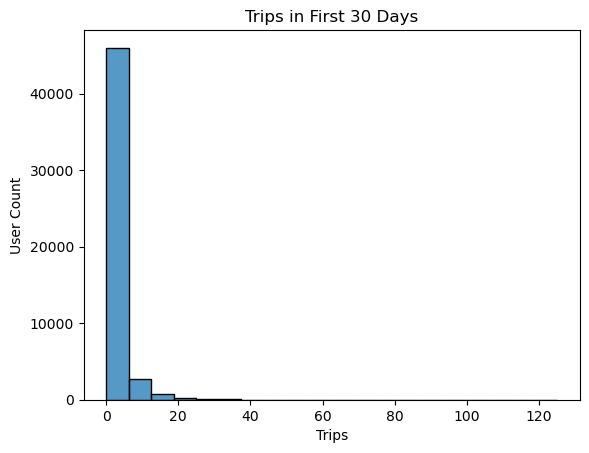

In [134]:
# 2. Exploratory Data Analysis
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

# Plot
sns.histplot(df['trips_in_first_30_days'], bins=20, kde=False)
plt.title("Trips in First 30 Days")
plt.xlabel("Trips")
plt.ylabel("User Count")
plt.show()



In [135]:
# 3. Preprocessing for Modeling
print(df.columns)



Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'retained'],
      dtype='object')


In [159]:
# 3. Preprocessing for Modeling
features = [
    'avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver',
    'surge_pct', 'avg_surge', 'trips_in_first_30_days',
    'ultimate_black_user', 'weekday_pct', 'city', 'phone'
]
X = df[features]
y = df['retained']
# Convert categorical variables into binary/dummy variables
X = pd.get_dummies(X, columns=['city', 'phone'], drop_first=True)


In [160]:

# 3. Preprocessing for Modeling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.80      0.82      0.81      6322
        True       0.68      0.65      0.67      3678

    accuracy                           0.76     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.76      0.76      0.76     10000



Feature importances:
avg_dist                  0.295731
weekday_pct               0.131087
avg_rating_by_driver      0.113891
surge_pct                 0.088874
avg_rating_of_driver      0.079637
trips_in_first_30_days    0.077188
avg_surge                 0.064327
city_King's Landing       0.063040
phone_iPhone              0.038116
ultimate_black_user       0.032516
city_Winterfell           0.015593
dtype: float64


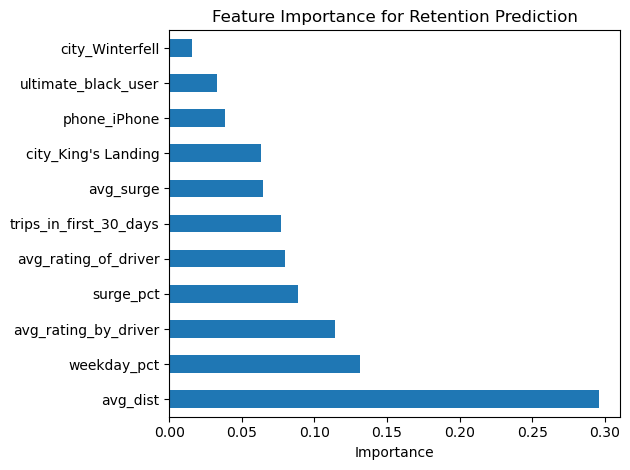

In [161]:
# 3. Preprocessing for Modeling

import pandas as pd
import matplotlib.pyplot as plt

# Get and plot feature importances
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

print("Feature importances:")
print(feature_importance)

# Plot
feature_importance.plot(kind='barh', title="Feature Importance for Retention Prediction")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [162]:
# ---------------------------------------------
# Model Performance Summary
# ---------------------------------------------

# The model achieves:
# - Accuracy: 76%
# - Precision (for retained users): 68%
# - Recall (for retained users): 65%
# - F1-score (for retained users): 67%

# Interpretation:
# The model performs well overall. It is especially useful for identifying users likely to remain active.
# While it misses some retained users (65% recall), its predictions are reasonably reliable (68% precision).

# ---------------------------------------------
# Feature Importances
# ---------------------------------------------

# Feature importance ranking from the random forest model:
# avg_dist                  0.296  → Long-distance users are more likely to retain
# weekday_pct               0.131  → Higher weekday usage correlates with retention
# avg_rating_by_driver      0.114  → Highly rated users tend to stick around
# surge_pct                 0.089  → Users tolerating surge pricing are more likely to stay
# avg_rating_of_driver      0.080  → Positive experience with drivers boosts retention
# trips_in_first_30_days    0.077  → Early engagement (more rides early) is a strong retention signal
# avg_surge                 0.064  → Users not deterred by surge pricing are more loyal
# city_King's Landing       0.063  → City-specific retention pattern (higher here)
# phone_iPhone              0.038  → iPhone users show slightly higher retention
# ultimate_black_user       0.033  → Premium users are more likely to return
# city_Winterfell           0.016  → City-specific retention lower here

# ---------------------------------------------
# Operational Recommendations
# ---------------------------------------------

# 1. Target users who take shorter trips early with promotions to try longer rides.
# 2. Encourage weekday usage during the first 30 days with commute-focused incentives.
# 3. Maintain high driver quality — user satisfaction is a key retention factor.
# 4. Create onboarding programs that increase activity in the first month.
# 5. Tailor strategies by city — test local incentives where retention is lower.
# 6. Use device type to tailor communication and promotions (e.g., iPhone vs Android).

# These actions could improve retention by focusing on the strongest predictors identified by the model.
